# Контрольное домашнее задание № 1.4
# Вариант 14

## Задание
Решить задачу многокритериальной оптимизации методом последовательных уступок


Многокритериальная задача:

$$f_1(X)=x_1 + x_2 → max$$
$$f_2(X)=-3x_1 + x_2 → max$$
$$f_3(X)=x_1 - 3x_2 → max$$

Ограничения:

$$ D = \begin{cases}
x_1+2x_2 ≤ 56 \\
2x_1+x_2 ≥ 14 \\
0 ≤ x_1 ≤ 28 \\
0 ≤ x_2 ≤ 21
\end{cases} \ $$ 

Приоритетность критериев:
$$f_2≻f_1≻f_3$$

Величина уступок:
$$𝛿f_1 = 3; 𝛿f_2 = 2$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

Визуализация области D:

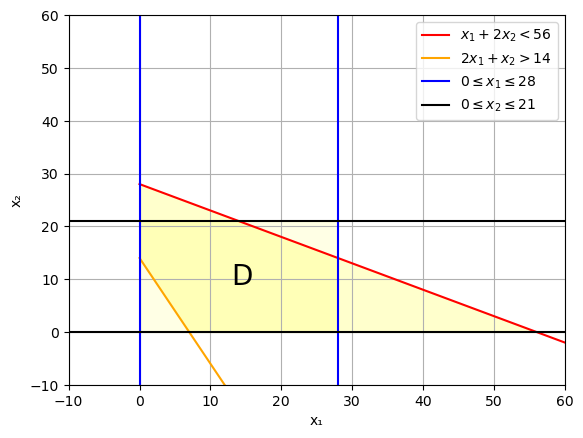

In [3]:
x1 = np.linspace(0, 60, 100)
l1 = (56 - x1) / 2
plt.plot(x1, l1, color='red', label=r'$x_1+2x_2<56$')

x2 = np.linspace(0, 50, 100)
l2 = 14 - 2 * x2 
plt.plot(x2, l2, color='orange', label=r'$2x_1+x_2>14$')


# закрашивание области D
x = np.linspace(0, 60, 100)
y1 = (56 - x) / 2
y2 = np.maximum(14 - 2 * x, 0)
plt.fill_between(x, y1, y2, where=(y1 >= y2) , color='yellow', alpha=0.2)

x3 = np.linspace(0, 28, 100)
y3 =  21 + (x3 * 0)
plt.fill_between(x3, y3, where=(y3 >= 0), color='yellow', alpha=0.1)

plt.axvline(0, color='blue')
plt.axvline(28, color='blue', label=r'$0\leq x_1\leq 28$')
plt.axhline(21, color='black', label=r'$0\leq x_2\leq 21$')
plt.axhline(0, color='black') 

plt.text(13,9, 'D', fontsize=20)
plt.xlim(-10, 60)
plt.ylim(-10, 60)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid()

plt.show()

In [4]:
# уступки
qf1=3
qf2=2


A = np.array([[1, 2], [-2, -1],[-1, 0],[1, 0], [0, -1], [0, 1]])
b = np.array([56, -14, 0, 28, 0, 21])
c = np.array([3, -1])
res = linprog(c, A_ub=A, b_ub=b)
print('Первая максимизация по f2:', res.fun*-1, '\n f2-qf2=', res.fun*-1-qf2)

f1 = round(res.fun*-1-qf2,3)
A1 = np.array([[1, 2], [-2, -1], [-1, 0], [1, 0], [0, -1], [0, 1], [3, -1]])
b1 = np.array([56, -14, 0, 28, 0, 21, -f1])
c1 = np.array([-1, -1])
res1 = linprog(c1, A_ub=A1, b_ub=b1)
print('Вторая максимизация по f1:', round(res1.fun*-1, 3), '\n f1-qf1=', round(res1.fun*-1-qf1, 3))

f2=round(res1.fun*-1-qf1,3)
A2 = np.array([[1, 2], [-2, -1], [-1, 0], [1, 0], [0, -1], [0, 1], [3, -1], [-1, -1]])
b2 = np.array([56, -14, 0, 28, 0, 21, -f1, -f2])
c2 = np.array([-1, 3])
res2 = linprog(c2, A_ub=A2, b_ub=b2)
print('Третья максимизация по f3:', res2.fun*-1, '\nОптимальная тчка:', res2.x)

Первая максимизация по f2: 21.0 
 f2-qf2= 19.0
Вторая максимизация по f1: 21.667 
 f1-qf1= 18.667
Третья максимизация по f3: -57.0 
Оптимальная тчка: [ 0. 19.]


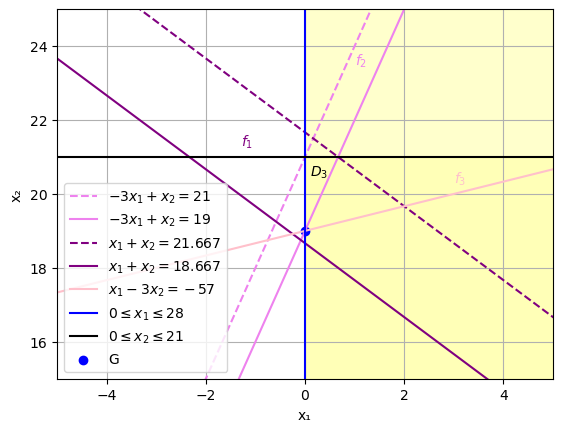

In [59]:
x1 = np.linspace(0, 60, 100)
l1 = (56 - x1) / 2
#plt.plot(x1, l1, color='red', label=r'$x_1+2x_2<56$')

x2 = np.linspace(0, 50, 100)
l2 = 14 - 2 * x2 
#plt.plot(x2, l2, color='orange', label=r'$2x_1+x_2>14$')


# закрашивание области D
x = np.linspace(0, 60, 100)
y1 = (56 - x) / 2
y2 = np.maximum(14 - 2 * x, 0)
plt.fill_between(x, y1, y2, where=(y1 >= y2) , color='yellow', alpha=0.2)

x3 = np.linspace(0, 28, 100)
y3 =  21 + (x3 * 0)
plt.fill_between(x3, y3, where=(y3 >= 0), color='yellow', alpha=0.1)

# оптимизация 
x4 = np.linspace(-10, 60, 100)
y4 = 21 + (3 * x4)
plt.plot(x4, y4, linestyle='--', color='violet', label=r'$-3x_1+x_2=21$')

f2_ = 19 + (3 * x4)
plt.plot(x4, f2_, color='violet', label=r'$-3x_1+x_2=19$')
plt.text(1, 23.5, r'$f_2$', color='violet')

y5 = 21 + (2/3) -  x4
plt.plot(x4, y5, linestyle='--', color='purple', label=r'$x_1+x_2=21.667$')


f1_ = 18 + (2/3) -  x4
plt.plot(x4, f1_, color='purple', label=r'$x_1+x_2=18.667$')
plt.text(-1.3, 21.3, r'$f_1$', color='purple')

f3_ = (-57 - x4) / (-3)
plt.plot(x4, f3_, color='pink', label=r'$x_1-3x_2=-57$')
plt.text(3, 20.3, r'$f_3$', color='pink')


plt.axvline(0, color='blue')
plt.axvline(28, color='blue', label=r'$0\leq x_1\leq 28$')
plt.axhline(21, color='black', label=r'$0\leq x_2\leq 21$')
plt.axhline(0, color='black') 

plt.scatter(0, 19, color='blue', label='G')

plt.text(0.1, 20.5, r'$D_3$')
plt.xlim(-5, 5)
plt.ylim(15, 25)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.legend()
plt.grid()

plt.show()